In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train_kOBLwZA.csv")
df_test = pd.read_csv("test_t02dQwI.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
def concat(X, Y):
    df = pd.concat([X, Y], ignore_index=True)
    return df

In [6]:
df = concat(df_train, df_test)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
#Checks the number of unique entries correspnding to each variable
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [10]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# Correcting The missplet parameter
df['Item_Fat_Content'].replace(to_replace= ['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [13]:
# Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Identifier column

df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)

# Dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [14]:
#Calculating number of Item_fat_contents that are also non_consumable

bool3 = df['Item_Type_combined'] == 'Non_consumable'
df['Item_Fat_Content'][bool3] = 'Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

In [15]:
#Using feature Engineering and adding new column
df['Year_Sold'] = 2013 - df['Outlet_Establishment_Year']
df = df.drop(columns = ['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,Year_Sold
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [16]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year_Sold
Item_Weight,1.000000,-0.015901,0.036236,0.014123,-0.000645
Item_Visibility,-0.015901,1.000000,-0.006351,-0.128625,0.083678
Item_MRP,0.036236,-0.006351,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Year_Sold,-0.000645,0.083678,-0.000141,0.049135,1.000000


In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year_Sold
count,11765.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,2181.288914,15.169319
std,4.652502,0.051459,62.086938,1706.499616,8.371664
min,4.555000,0.000000,31.290000,33.290000,4.000000
25%,8.710000,0.027036,94.012000,834.247400,9.000000
50%,12.600000,0.054021,142.247000,1794.331000,14.000000
75%,16.750000,0.094037,185.855600,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


## Outliers

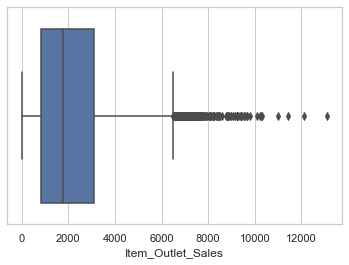

In [20]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['Item_Outlet_Sales'])

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

Item_Weight             8.040000
Item_Visibility         0.067002
Item_MRP               91.843600
Item_Outlet_Sales    2267.049000
Year_Sold              17.000000
dtype: float64 Item_Weight            16.750000
Item_Visibility         0.094037
Item_MRP              185.855600
Item_Outlet_Sales    3101.296400
Year_Sold              26.000000
Name: 0.75, dtype: float64 Item_Weight            8.710000
Item_Visibility        0.027036
Item_MRP              94.012000
Item_Outlet_Sales    834.247400
Year_Sold              9.000000
Name: 0.25, dtype: float64


In [24]:
# for Item_Outlet_Sales
print((Q3+1.5*IQR))

Item_Weight            28.81000
Item_Visibility         0.19454
Item_MRP              323.62100
Item_Outlet_Sales    6501.86990
Year_Sold              51.50000
dtype: float64


In [25]:
def total_ouliers(X,Y):
    c = 0
    for i in X:
        if i > Y:
            c = c + 1
    print(c)

In [26]:
total_ouliers(df.Item_Outlet_Sales,6501)

186


In [27]:
total_ouliers(df.Item_Visibility,0.19454)

261


**As we know only Item_Outlet_Sales have outliers we can fix them but fixing them will increase our RMSE score to a large extent**

### Plotting Graphs for more Analysis

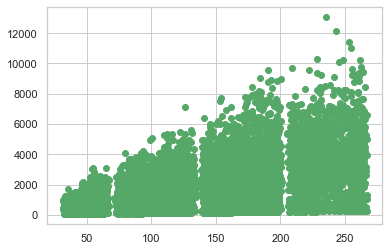

In [21]:
#value of sales increases for the increase in MRP of the item
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales,c='g')
plt.show()

**Values above 6000/8000 can be considered an outlier**

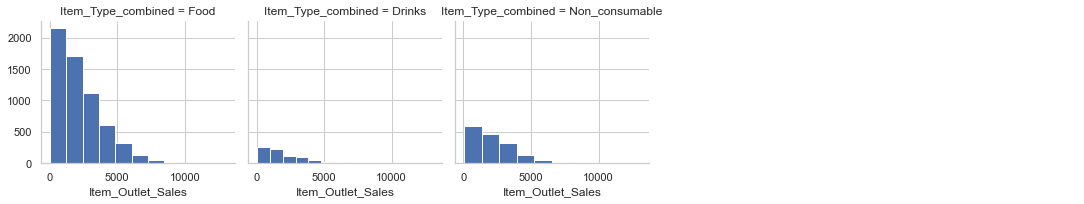

In [22]:
sns.FacetGrid(df, col='Item_Type_combined', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

**Maximum contribution to outlet sales is from Items that are food type and least is from drinks**

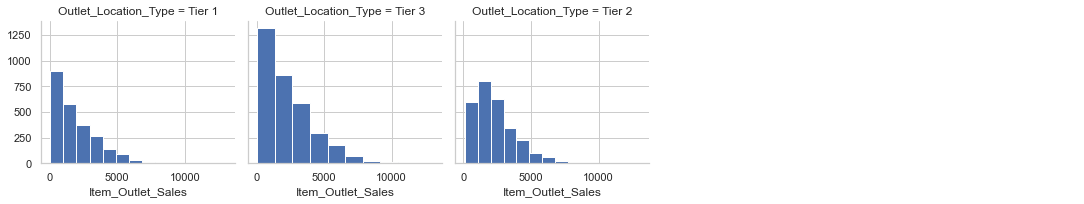

In [28]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

**Tier 3 type of outlet location provides for the maximum sales and other two provides the least sales**

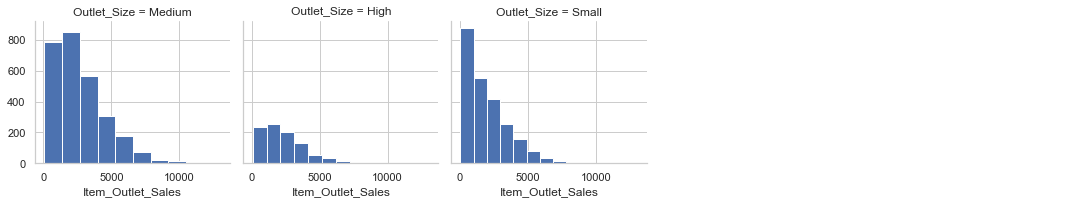

In [29]:
sns.FacetGrid(df, col='Outlet_Size', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

**Small sized Outlets are providing the maximum sales whereas large sized outlets are contributing the least**

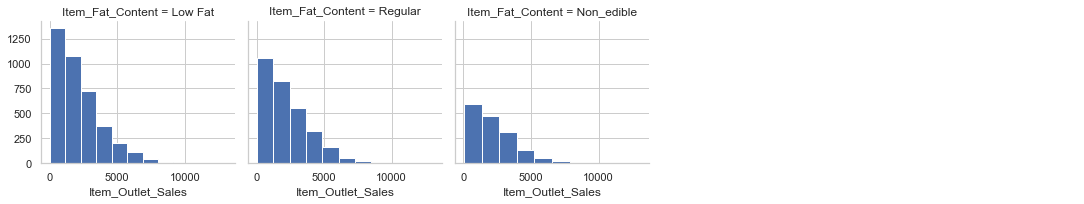

In [30]:
sns.FacetGrid(df, col='Item_Fat_Content', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

**people are prefering items with lowest fat content the most**

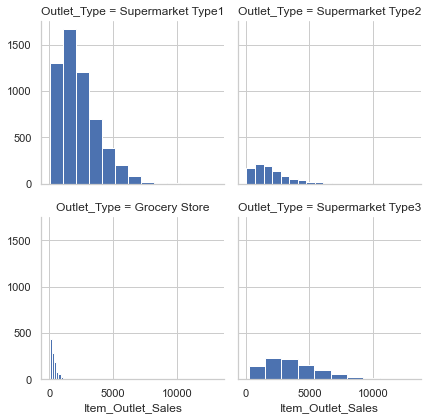

In [31]:
sns.FacetGrid(df, col='Outlet_Type', size=3, col_wrap=2) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

* Maximum of the high sales margin is from Supermarket Type1
* Grocery store has the least sales

## Modelling

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,Year_Sold
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [34]:
#Label Encoding all the columns with text entries and dropping Item_identifier  
le = LabelEncoder()
list = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']

for i in list:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    
df_new = df.drop(columns='Item_Identifier')
df_new = pd.get_dummies(df_new, columns=['Outlet_Identifier'])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,Year_Sold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,3,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0


In [35]:
# Separating test and train set

# Selected all the rows from 0 to 8523 and select all the columns
df_new_train = df_new.iloc[:8523,:]

# Selected all the rows from 8523 to the last
df_new_test = df_new.iloc[8523:,:]

df_new_test = df_new_test.drop(columns=['Item_Outlet_Sales'])

In [36]:
Y_train = df_new_train['Item_Outlet_Sales']
df_train_test = df_new_train.drop(columns=['Item_Outlet_Sales'])

In [40]:
np.random.seed(42)

models = ["Linear Regression: ", LinearRegression(),
         "Ridge: ", Ridge(),
         "Random Forest: ", RandomForestRegressor(),
         "Extra Trees: ", ExtraTreesRegressor(),
         "Bagging Regressor: ", BaggingRegressor(),
         "Gradient Boosting: ", GradientBoostingRegressor(), 
         "Elastic Net: ", ElasticNet(), 
         "MLP Regressor: ", MLPRegressor()
         ]

#Making function for making best 2 models for further hyperparameter tuning
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [43]:
basic_model_selection(df_train_test, Y_train, 1, models)

ValueError: too many values to unpack (expected 2)